# Exploratory Discovery Analysis

In this notebook we explore the provided data. First, let set up the environment for the notebook

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# DATA CONFIG
TRAIN_DATA = "data/train.csv"
EXISTING_MRT_DATA = "data/auxiliary-data/auxiliary-data/sg-mrt-existing-stations.csv"

The training data is provided in the `train.csv` file.

In [4]:
train_df = pd.read_csv(TRAIN_DATA)
train_df.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


# Data Preprocessing
There are several attributes we need to normalize the values.
Let start with `flat_type`

<Axes: ylabel='count'>

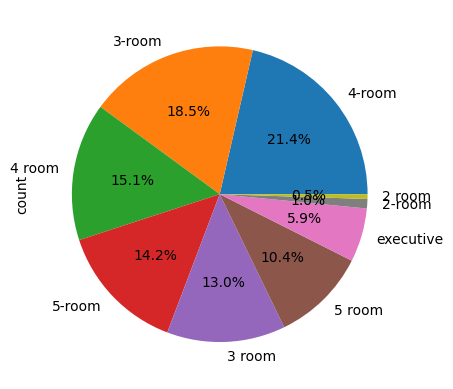

In [5]:
train_df.flat_type.value_counts().plot.pie(autopct="%1.1f%%")

We notice that there is an issue here, 2 room flat can be set as `2 room` or `2-room`. Let clean them up by removing the hyphen.

<Axes: ylabel='count'>

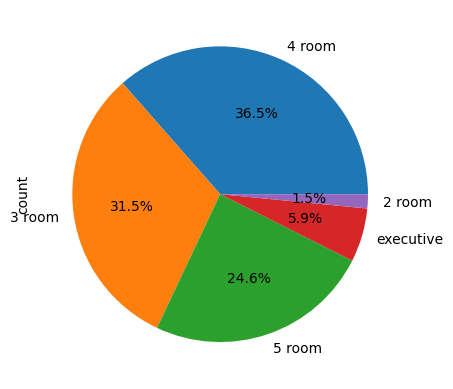

In [6]:
train_df.flat_type = train_df.flat_type.str.replace('-', ' ')
train_df.flat_type.value_counts().plot.pie(autopct="%1.1f%%")

After fixing the values, we can see the most common apartment for rent is 4 room apartments (36.5%), 3 room (31.5%) and 5 room aparments 24.6%)

## Transforming duplicates records

In [7]:
attr_cols = list(train_df.columns.drop('monthly_rent'))
duplicate_indexes = train_df[attr_cols].duplicated()
num_duplicate_records = duplicate_indexes.sum()
print(f"There are {num_duplicate_records} ({num_duplicate_records/len(train_df):.2%}) in the train data")

There are 3457 (5.76%) in the train data


In [8]:
train_df[duplicate_indexes]

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
725,2021-03,ang mo kio,649,ang mo kio avenue 5,3 room,new generation,75.0,yes,1980,1.377763,103.843782,0.0,yio chu kang west,ang mo kio,north-east region,2300
801,2021-01,tampines,157,Tampines Street 12,3 room,new generation,82.0,yes,1985,1.351073,103.945004,0.0,tampines east,tampines,east region,1850
832,2022-11,bishan,407,sin ming avenue,3 room,simplified,64.0,yes,1986,1.363453,103.834215,0.0,upper thomson,bishan,central region,1850
885,2021-02,bukit merah,38,jalan rumah tinggi,4 room,model a,100.0,yes,1997,1.288634,103.809644,0.0,alexandra hill,bukit merah,central region,2950
1184,2023-05,bedok,412,Bedok North Avenue 2,3 room,new generation,67.0,yes,1979,1.329291,103.931091,0.0,bedok north,bedok,east region,2600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59955,2022-03,jurong west,209,boon lay place,3 room,improved,65.0,yes,1976,1.346258,103.715155,0.0,boon lay place,jurong west,west region,2000
59960,2022-02,clementi,611,clementi west street 1,3 room,model a,74.0,yes,1983,1.303697,103.769477,0.0,clementi woods,clementi,west region,2050
59968,2022-07,ang mo kio,433,ang mo kio avenue 10,3 room,new generation,67.0,yes,1979,1.368077,103.854353,0.0,chong boon,ang mo kio,north-east region,1250
59969,2021-08,sengkang,275b,compassvale link,4 room,premium apartment,90.0,yes,2009,1.383339,103.894522,0.0,compassvale,sengkang,north-east region,2950


In [9]:
dedup_traindf = train_df.groupby(attr_cols).mean().reset_index()

In [10]:
# make sure that there is no duplicate records
num_duplicate_left = dedup_traindf.duplicated().sum()
print(f"Number of duplicates record after processing {num_duplicate_left}")

Number of duplicates record after processing 0


# Lat/Long Visualization

We want to see whether the location of the premise affect the price of it or not. We visualize both monthly price and price per squared meters.

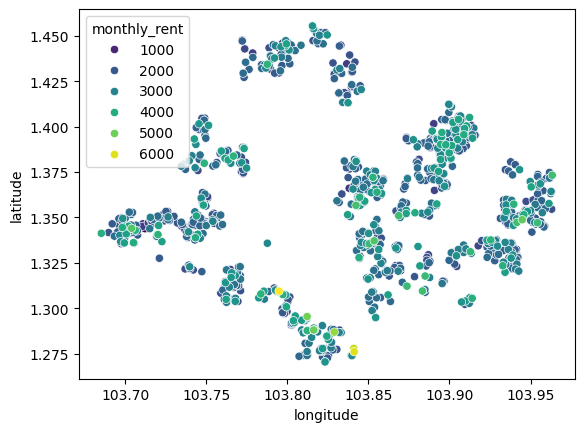

In [18]:
sampled_data = train_df.sample(1000).sort_values("monthly_rent")
latlon_plot_1 = sns.scatterplot(sampled_data, x="longitude", y="latitude", hue="monthly_rent", palette="viridis")
fig = latlon_plot_1.get_figure()
fig.savefig("figures/latlon_monthly.pdf", dpi=350, bbox_inches="tight")

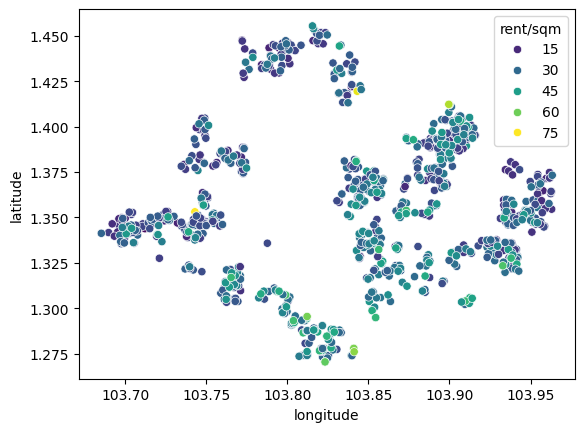

In [19]:
sampled_data['rent/sqm'] = sampled_data['monthly_rent'] / sampled_data['floor_area_sqm']
latlon_plot_1 = sns.scatterplot(sampled_data, x="longitude", y="latitude", hue="rent/sqm", palette="viridis")
fig = latlon_plot_1.get_figure()
fig.savefig("figures/latlon_monthly_sqm.pdf", dpi=350, bbox_inches="tight")

## Relationships between facilities and the premise

Using great circle formula, we can calculate the distance (in term of meters) between the premise and other facilities such as MRTs, malls, and primary schools.

First, let see the relationship between distance to MRT and monthly rent. Note that there are several MRT stations having the same location, e.g. NS1/EW24. For those stations, we can safely keep only 1.

In [11]:
from preprocessing import distance_to_nearest_place

MRT_DATAFRAME_PATH = "data/auxiliary-data/auxiliary-data/sg-mrt-existing-stations.csv"
POSITION_ATTRS = ['latitude', 'longitude']
mrt_df = pd.read_csv(MRT_DATAFRAME_PATH).drop_duplicates(POSITION_ATTRS)
dedup_traindf[['nearest_mrt_dist', 'nearest_mrt_code']] = \
    dedup_traindf.apply(
        lambda row: distance_to_nearest_place(row, mrt_df, 'code'),
        axis=1,
        result_type="expand"
)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [26]:
mrt_df.head()

,code,name,opening_year,latitude,longitude
0,NS1,Jurong East,1990,1.333295,103.742154
1,NS2,Bukit Batok,1990,1.349035,103.749526
2,NS3,Bukit Gombak,1990,1.358663,103.751913
3,NS4,Choa Chu Kang,1990,1.385363,103.744371
4,NS5,Yew Tee,1996,1.397476,103.747418


Before plotting, instead of using `monthly_rent` we can use monthly rent per square meters to normalize the rental.

In [12]:
dedup_traindf['rent_per_sq'] = dedup_traindf['monthly_rent'] / dedup_traindf['floor_area_sqm']
NUM_SAMPLES = 500
samples = dedup_traindf[(dedup_traindf.rent_approval_date == "2021-03") & (dedup_traindf.flat_type == "3 room")]
samples = samples.sample(NUM_SAMPLES)

<Axes: >

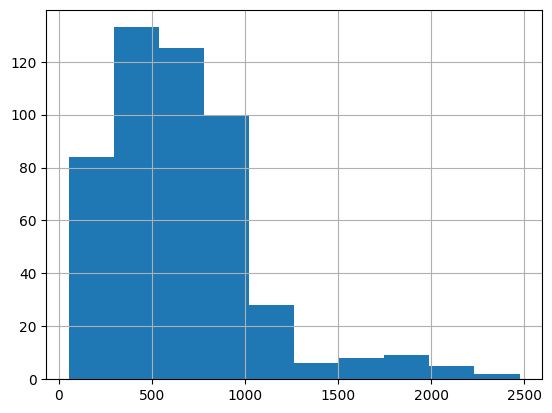

In [13]:
samples.nearest_mrt_dist.hist()

<Axes: xlabel='nearest_mrt_dist', ylabel='rent_per_sq'>

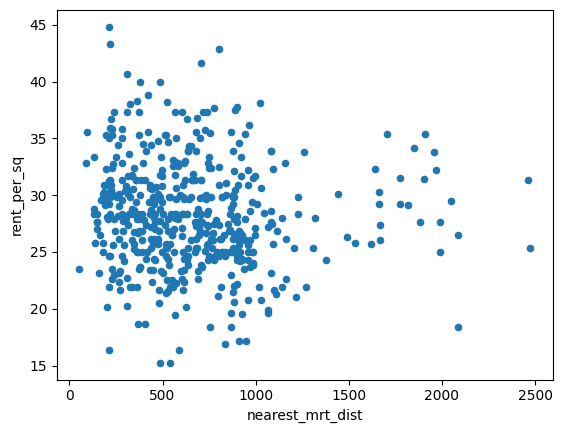

In [14]:
samples.plot.scatter(x='nearest_mrt_dist', y='rent_per_sq')

Most of the premises are 200-600 meters from its closest MRT. There are few apartments that are more than 1000 meters from a MRT. 

<Axes: ylabel='nearest_mrt_code'>

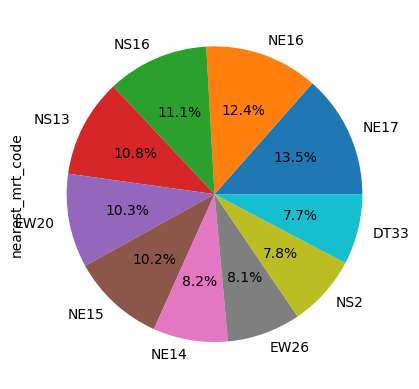

In [15]:
dedup_traindf.nearest_mrt_code.value_counts().nlargest(10).plot.pie(autopct="%1.1f%%")

<Axes: xlabel='nearest_mrt_dist', ylabel='rent_per_sq'>

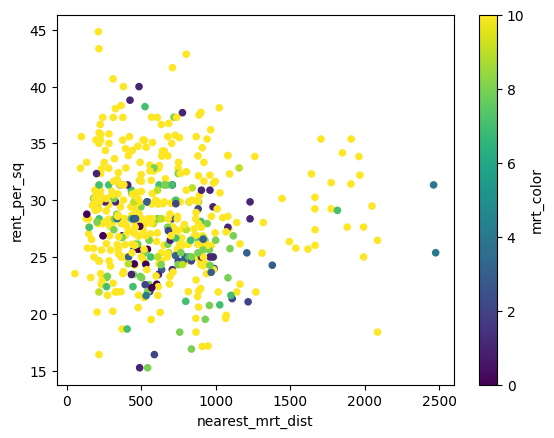

In [16]:
top_nearest_mrts = dedup_traindf.nearest_mrt_code.value_counts().nlargest(10).index
mrts_to_ints = pd.Categorical(top_nearest_mrts).codes
mrts_to_ints = dict(zip(top_nearest_mrts, mrts_to_ints))
mrts_to_ints.update({mrt: 10 for mrt in dedup_traindf.nearest_mrt_code.unique() if mrt not in mrts_to_ints.keys()})
samples['mrt_color'] = samples.nearest_mrt_code.map(mrts_to_ints)
samples.plot.scatter(x='nearest_mrt_dist', y='rent_per_sq', c='mrt_color', colormap='viridis')

# Distance to malls

In [17]:
SHOPPING_DATAFRAME_PATH = "data/auxiliary-data/auxiliary-data/sg-shopping-malls.csv"
mall_df = pd.read_csv(SHOPPING_DATAFRAME_PATH).drop_duplicates(POSITION_ATTRS)
samples[['nearest_mall_dist', 'nearest_mall_name']] = \
    samples.apply(
        lambda row: distance_to_nearest_place(row, mall_df, 'name'),
        axis=1,
        result_type="expand"
)

In [27]:
samples

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,...,region,monthly_rent,nearest_mrt_dist,nearest_mrt_code,rent_per_sq,mrt_color,nearest_mall_dist,nearest_mall_name,nearest_school_dist,nearest_school_name
4724,2021-03,jurong west,463,Jurong West Street 41,3 room,new generation,67.0,yes,1985,1.350577,...,west region,1650.0,747.292768,EW26,24.626866,2,1285.054850,Boon Lay Shopping Centre,377.028998,Shuqun Primary School
4653,2021-03,jurong east,34,teban gardens road,3 room,improved,74.0,yes,1977,1.319880,...,west region,1950.0,1492.389919,NS1,26.351351,10,1419.078469,Jem,1809.758832,Qifa Primary School
5864,2021-03,yishun,716,yishun street 71,3 room,simplified,64.0,yes,1987,1.426211,...,north region,1800.0,898.849619,NS13,28.125000,7,994.422748,Northpoint City,344.244211,Jiemin Primary School
4073,2021-03,bukit merah,104,bukit purmei road,3 room,model a,73.0,yes,1984,1.272399,...,central region,1900.0,968.746155,NE1,26.027397,10,1569.862975,Tiong Bahru Plaza,326.403730,Radin Mas Primary School
3739,2021-03,ang mo kio,533,ang mo kio avenue 5,3 room,new generation,67.0,yes,1980,1.374169,...,north-east region,1900.0,607.007531,NS16,28.358209,8,632.317656,Jubilee Square,246.450810,Jing Shan Primary School
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,2021-03,kallang/whampoa,74,whampoa drive,3 room,improved,66.0,yes,1981,1.324716,...,central region,1900.0,691.870987,NE9,28.787879,10,1196.013484,HDB Hub,328.960451,Hong Wen School
4663,2021-03,jurong east,412,pandan gardens,3 room,improved,72.0,yes,1979,1.319621,...,west region,1850.0,1617.322416,NS1,25.694444,10,1500.258182,Jem,1272.306951,Qifa Primary School
3906,2021-03,bedok,77,Bedok North Road,3 room,improved,60.0,yes,1986,1.328696,...,east region,1900.0,498.822848,EW4,31.666667,10,1412.376424,Djitsun Mall Bedok,675.268134,St. Anthony's Canossian Primary School
3670,2021-03,ang mo kio,214,Ang Mo Kio Avenue 3,3 room,new generation,67.0,yes,1976,1.367392,...,north-east region,1900.0,679.619283,TE6,28.358209,10,736.671950,Broadway Plaza,1059.580302,CHIJ St. Nicholas Girls' School (Primary Section)


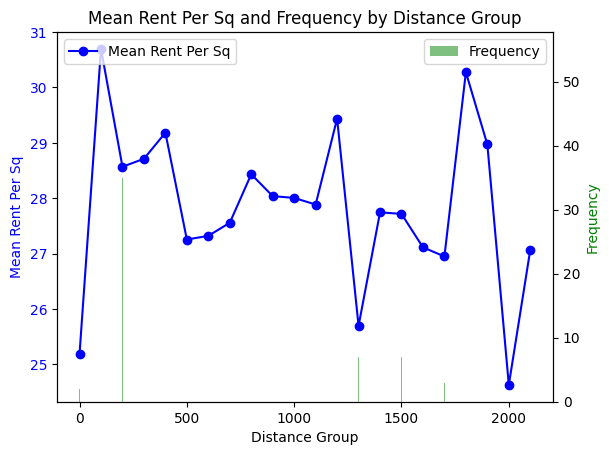

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'samples' is your DataFrame
grouped_mean = samples.groupby(samples['nearest_mall_dist'] // 100 * 100)['rent_per_sq'].mean()
grouped_freq = samples.groupby(samples['nearest_mall_dist'] // 100 * 100)['rent_per_sq'].count()

# Create a figure and axis for the line graph
fig, ax1 = plt.subplots()

# Plot the line graph (mean of rent_per_sq)
ax1.plot(grouped_mean.index, grouped_mean, color='b', marker='o', label='Mean Rent Per Sq')
ax1.set_xlabel('Distance Group')
ax1.set_ylabel('Mean Rent Per Sq', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary axis for the bar graph (frequency)
ax2 = ax1.twinx()
ax2.bar(grouped_freq.index, grouped_freq, alpha=0.5, color='g', label='Frequency')
ax2.set_ylabel('Frequency', color='g')

# Show legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Mean Rent Per Sq and Frequency by Distance Group')
plt.show()


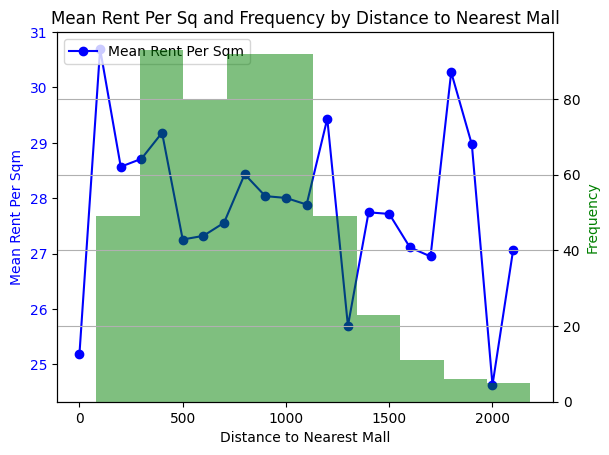

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'samples' is your DataFrame
grouped_mean = samples.groupby(samples['nearest_mall_dist'] // 100 * 100)['rent_per_sq'].mean()

# Create a figure and axis for the line graph
fig, ax1 = plt.subplots()

# Plot the line graph (mean of rent_per_sq)
ax1.plot(grouped_mean.index, grouped_mean, color='b', marker='o', label='Mean Rent Per Sqm')
ax1.set_xlabel('Distance to Nearest Mall')
ax1.set_ylabel('Mean Rent Per Sqm', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot the histogram of 'nearest_mall_dist'
ax2 = ax1.twinx()
samples['nearest_mall_dist'].hist(ax=ax2, bins=10, color='g', alpha=0.5)
ax2.set_ylabel('Frequency', color='g')

# Show legends
ax1.legend(loc='upper left')

plt.title('Mean Rent Per Sq and Frequency by Distance to Nearest Mall')
plt.show()


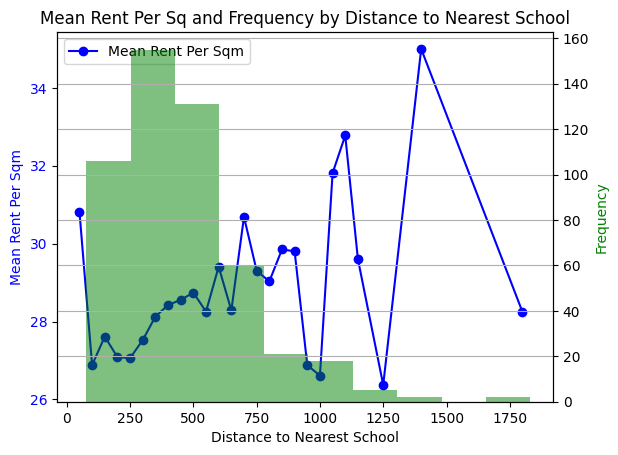

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'samples' is your DataFrame
grouped_mean = samples.groupby(samples['nearest_school_dist'] // 50 * 50)['rent_per_sq'].mean()

# Create a figure and axis for the line graph
fig, ax1 = plt.subplots()

# Plot the line graph (mean of rent_per_sq)
ax1.plot(grouped_mean.index, grouped_mean, color='b', marker='o', label='Mean Rent Per Sqm')
ax1.set_xlabel('Distance to Nearest School')
ax1.set_ylabel('Mean Rent Per Sqm', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot the histogram of 'nearest_school_dist'
ax2 = ax1.twinx()
samples['nearest_school_dist'].hist(ax=ax2, bins=10, color='g', alpha=0.5)
ax2.set_ylabel('Frequency', color='g')

# Show legends
ax1.legend(loc='upper left')

plt.title('Mean Rent Per Sq and Frequency by Distance to Nearest School')
plt.show()


<Axes: >

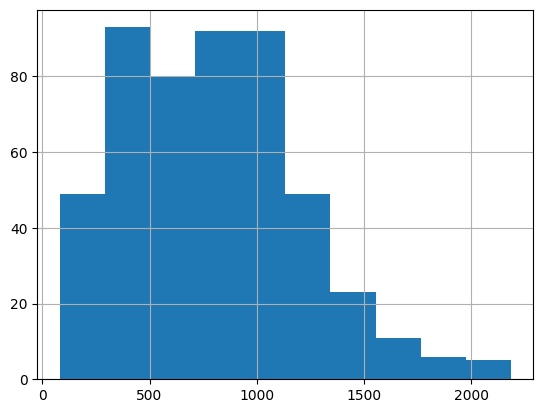

<Axes: xlabel='nearest_mall_dist', ylabel='rent_per_sq'>

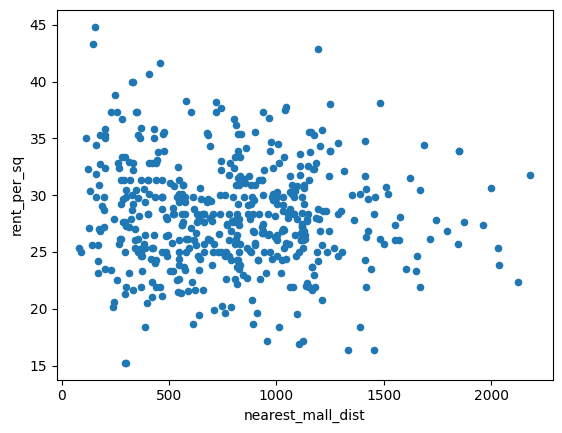

In [19]:
samples.plot.scatter(x='nearest_mall_dist', y='rent_per_sq')

From those figures, we have some observations:

- Most of the apartments are less than 1km from the closest MRT, and 1.5km from the nearest mall.
- Although both signals are not signaficant to completely control the monthly rent, we can see some trends.

For example, if the apartment is too far from facility, its monthly rent cannot be higher than the average.

# Distances to primariy schools

In [20]:
SCHOOL_DATAFRAME_PATH = "data/auxiliary-data/auxiliary-data/sg-primary-schools.csv"
mall_df = pd.read_csv(SCHOOL_DATAFRAME_PATH).drop_duplicates(POSITION_ATTRS)
samples[['nearest_school_dist', 'nearest_school_name']] = \
    samples.apply(
        lambda row: distance_to_nearest_place(row, mall_df, 'name'),
        axis=1,
        result_type="expand"
)

In [23]:
mall_df

,name,latitude,longitude
0,Admiralty Primary School,1.454038,103.817436
1,Ahmad Ibrahim Primary School,1.433153,103.832942
2,Ai Tong School,1.360583,103.833020
3,Alexandra Primary School,1.291334,103.824425
4,Anchor Green Primary School,1.390370,103.887165
...,...,...,...
180,Yuhua Primary School,1.342802,103.741106
181,Yumin Primary School,1.351292,103.950462
182,Zhangde Primary School,1.284212,103.825952
183,Zhenghua Primary School,1.379549,103.769314


<Axes: >

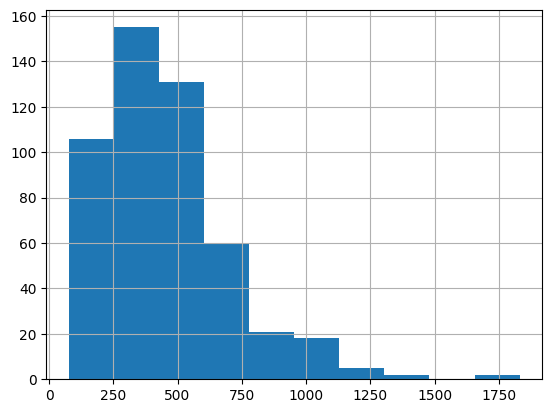

In [21]:
samples.nearest_school_dist.hist()

<Axes: xlabel='nearest_school_dist', ylabel='rent_per_sq'>

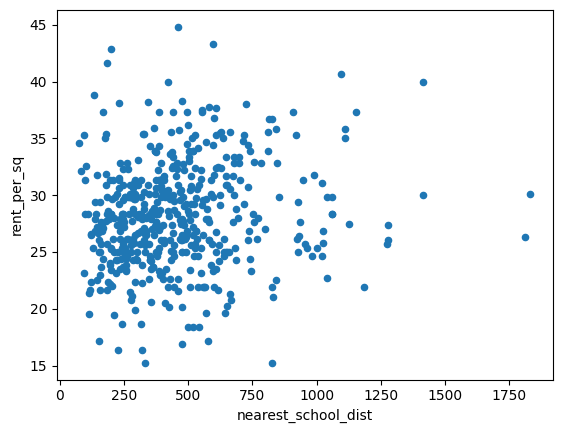

In [22]:
samples.plot.scatter(x='nearest_school_dist', y='rent_per_sq')

In [24]:
SCHOOL_DATAFRAME_PATH = "data/auxiliary-data/auxiliary-data/sg-primary-schools.csv"
school_df = pd.read_csv(SCHOOL_DATAFRAME_PATH).drop_duplicates(POSITION_ATTRS)

In [25]:
school_df

,name,latitude,longitude
0,Admiralty Primary School,1.454038,103.817436
1,Ahmad Ibrahim Primary School,1.433153,103.832942
2,Ai Tong School,1.360583,103.833020
3,Alexandra Primary School,1.291334,103.824425
4,Anchor Green Primary School,1.390370,103.887165
...,...,...,...
180,Yuhua Primary School,1.342802,103.741106
181,Yumin Primary School,1.351292,103.950462
182,Zhangde Primary School,1.284212,103.825952
183,Zhenghua Primary School,1.379549,103.769314
